[View in Colaboratory](https://colab.research.google.com/github/jgrandinetti/AI/blob/master/SBRT.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf as plt_pdf
import pandas as pd
import os
from tensorflow import keras as k
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install xlrd

In [0]:
model = k.models.Sequential()
model.add(k.layers.Dense(64, activation='relu', input_shape=(15,)))
model.add(k.layers.Dense(32, activation='relu'))
model.add(k.layers.Dense(8, activation='relu'))
model.add(k.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=k.optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Keras NN Model

df = pd.read_excel('drive/My Drive/Colab_Notebooks/Lung-SBRT-Data.xlsx')
df = df.values

#np.random.seed(12)

acc = []
loss = []

its = 100
size = 81

for it in range(its):  
  
  testing_split = np.random.uniform(0.05, 0.4)

  training_size = int(size*(1-testing_split))
  testing_size = int(size*testing_split)

  total=training_size + testing_size
  if total < size:
    training_size += 1
  elif total > size:
    training_size -= 1

  # Training
  tumor_outcome_tr = [] # column 18
  tumor_size_tr = [] # 5
  hist_tr = []
  loc_tr = []
  stage_tr = []
  dose_tr = []
  frac_tr = []
  dose_per_frac_tr = []
  central_tr = [] # 4
  anti_inf_tr = [] # 12
  anti_dia_tr = [] # 13
  met_tr = [] # 14
  stat_tr = [] # 15
  ACE_tr = [] # 16
  ASA_tr = [] # 17



  # Testing
  tumor_outcome_te = [] # column 18
  tumor_size_te = []
  hist_te = []
  loc_te = []
  stage_te = []
  dose_te = []
  frac_te = []
  dose_per_frac_te = []
  central_te = [] # 4
  anti_inf_te = [] # 12
  anti_dia_te = [] # 13
  met_te = [] # 14
  stat_te = [] # 15
  ACE_te = [] # 16
  ASA_te = [] # 17


  var_len = training_size + testing_size
  arr = np.arange(var_len)
  np.random.shuffle(arr)

  for yy in range(0,training_size):
      x = arr[yy]
      tumor_outcome_tr.append(df[x][18])
      tumor_size_tr.append(df[x][5])
      hist_tr.append(df[x][6])
      loc_tr.append(df[x][7])
      stage_tr.append(df[x][8])
      dose_tr.append(df[x][9])
      frac_tr.append(df[x][10])
      dose_per_frac_tr.append(df[x][11])
      central_tr.append(df[x][4])
      anti_inf_tr.append(df[x][12])
      anti_dia_tr.append(df[x][13])
      met_tr.append(df[x][14])
      stat_tr.append(df[x][15])
      ACE_tr.append(df[x][16])
      ASA_tr.append(df[x][17])

  for xx in range(training_size, var_len):
      y = arr[xx]
      tumor_outcome_te.append(df[y][18])
      tumor_size_te.append(df[y][5])
      hist_te.append(df[y][6])
      loc_te.append(df[y][7])
      stage_te.append(df[y][8])
      dose_te.append(df[y][9])
      frac_te.append(df[y][10])
      dose_per_frac_te.append(df[y][11])
      central_te.append(df[x][4])
      anti_inf_te.append(df[x][12])
      anti_dia_te.append(df[x][13])
      met_te.append(df[x][14])
      stat_te.append(df[x][15])
      ACE_te.append(df[x][16])
      ASA_te.append(df[x][17])

  X_train = np.stack((np.array(tumor_size_tr), 
                      np.array(hist_tr), 
                      np.array(loc_tr), 
                      np.array(stage_tr), 
                      np.array(dose_tr), 
                      np.array(frac_tr), 
                      np.array(dose_per_frac_tr), 
                      np.array(central_tr), 
                      np.array(anti_inf_tr), 
                      np.array(anti_dia_tr), 
                      np.array(met_tr), 
                      np.array(stat_tr), 
                      np.array(ACE_tr), 
                      np.array(ACE_tr), 
                      np.array(ASA_tr)))
  X_train = X_train.T 
  Y_train = np.array(tumor_outcome_tr)


  X_test = np.stack((np.array(tumor_size_te), 
                     np.array(hist_te), 
                     np.array(loc_te), 
                     np.array(stage_te), 
                     np.array(dose_te), 
                     np.array(frac_te), 
                     np.array(dose_per_frac_te), 
                     np.array(central_te), 
                     np.array(anti_inf_te), 
                     np.array(anti_dia_te), 
                     np.array(met_te), 
                     np.array(stat_te), 
                     np.array(ACE_te), 
                     np.array(ACE_te), 
                     np.array(ASA_te)))
  X_test = X_test.T
  Y_test = np.array(tumor_outcome_te)

  # Fit Model

  history = model.fit(X_train, Y_train ,epochs=25, batch_size=5)
  results = model.evaluate(X_test, Y_test)
  acc.append(results[1])
  loss.append(results[0])
  

In [26]:
print("Results for %0.0f random groupings of data" %its)
print("-----------------------")
acc = np.array(acc)
print("Accuracy:",np.average(acc)*100,"%")

loss = np.array(loss)
print("Loss:",np.average(loss))

# print("-----------------------")
# print()
# print(acc)
# print()
# print(loss)

Results for 100 random groupings of data
-----------------------
Accuracy: 69.89991855621338 %
Loss: 2.3607174477353694


  0%|          | 20/10000 [00:00<00:51, 194.36it/s]


average accuracy: 65.64 %


100%|██████████| 10000/10000 [00:44<00:00, 223.07it/s]



average accuracy: 65.86 %


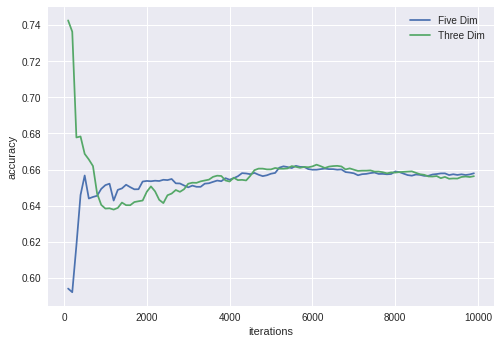

In [42]:
# KNN Model

its2 = 10000 # number of iterations to average for the model
size = 81
num_points = 3

acc1 = []
its_count1 = []
running_avg1 = []

# np.random.seed(42)

for it in tqdm(range(its2)):

    testing_split = np.random.uniform(0.1, 0.15)

    training_size = int(size*(1-testing_split))
    testing_size = int(size*testing_split)

    total=training_size + testing_size
    if total < size:
        training_size += 1
    elif total > size:
        training_size -= 1

    # Training
    tumor_outcome_tr = [] # column 18
    tumor_size_tr = [] # 5
    hist_tr = []
    loc_tr = []
    stage_tr = []
    dose_tr = []
    frac_tr = []
    dose_per_frac_tr = []
    central_tr = [] # 4
    anti_inf_tr = [] # 12
    anti_dia_tr = [] # 13
    met_tr = [] # 14
    stat_tr = [] # 15
    ACE_tr = [] # 16
    ASA_tr = [] # 17



    # Testing
    tumor_outcome_te = [] # column 18
    tumor_size_te = []
    hist_te = []
    loc_te = []
    stage_te = []
    dose_te = []
    frac_te = []
    dose_per_frac_te = []
    central_te = [] # 4
    anti_inf_te = [] # 12
    anti_dia_te = [] # 13
    met_te = [] # 14
    stat_te = [] # 15
    ACE_te = [] # 16
    ASA_te = [] # 17


    var_len = training_size + testing_size
    arr = np.arange(var_len)
    np.random.shuffle(arr)

    for yy in range(0,training_size):
        x = arr[yy]
        tumor_outcome_tr.append(df[x][18])
        tumor_size_tr.append(df[x][5])
        hist_tr.append(df[x][6])
        # loc_tr.append(df[x][7])
        stage_tr.append(df[x][8])
        dose_tr.append(df[x][9])
        # frac_tr.append(df[x][10])
        # dose_per_frac_tr.append(df[x][11])
        # central_tr.append(df[x][4])
        anti_inf_tr.append(df[x][12])
        anti_dia_tr.append(df[x][13])
        # met_tr.append(df[x][14])
        # stat_tr.append(df[x][15])
        # ACE_tr.append(df[x][16])
        # ASA_tr.append(df[x][17])

    for xx in range(training_size, var_len):
        y = arr[xx]
        tumor_outcome_te.append(df[y][18])
        tumor_size_te.append(df[y][5])
        hist_te.append(df[y][6])
        # loc_te.append(df[y][7])
        stage_te.append(df[y][8])
        dose_te.append(df[y][9])
        # frac_te.append(df[y][10])
        # dose_per_frac_te.append(df[y][11])
        # central_te.append(df[x][4])
        anti_inf_te.append(df[x][12])
        anti_dia_te.append(df[x][13])
        # met_te.append(df[x][14])
        # stat_te.append(df[x][15])
        # ACE_te.append(df[x][16])
        # ASA_te.append(df[x][17])

    for z in range(testing_size): #testing size
        distance = [] # euclidean norm of the distance between testing and training
        corr_guess = []
        incorr_guess = []
        fail = []
        no_fail = []
        for zz in range(training_size):
            dim1 = (hist_te[z] - hist_tr[zz])**2
            dim2 = (stage_te[z] - stage_tr[zz])**2
            dim3 = (dose_te[z] - dose_tr[zz])**2
            dim4 = (tumor_size_te[z] - tumor_size_tr[zz])**2
            # dim5 = (anti_inf_te[z] - anti_inf_tr[zz])**2
            # dim6 = (anti_dia_te[z] - anti_dia_tr[zz])**2
            euc_norm = np.sqrt(dim1 + dim2 + dim3 + dim4)
            distance.append(euc_norm)

        order = np.argsort(distance)

        for t in range(num_points):
            if tumor_outcome_tr[order[t]] == 1: # tumor present
                fail.append(1)
            elif tumor_outcome_tr[order[t]] == 0: # no tumor
                no_fail.append(1)

        if len(fail) < len(no_fail):
            guess = 'No Tumor'
        else:
            guess = 'Tumor'

        if tumor_outcome_te[z] == 1 and guess == 'Tumor':
            corr_guess.append(1)
        elif tumor_outcome_te[z] == 1 and guess == 'No Tumor':
            incorr_guess.append(1)
        elif tumor_outcome_te[z] == 0 and guess == 'No Tumor':
            corr_guess.append(1)
        elif tumor_outcome_te[z] == 0 and guess == 'Tumor':
            incorr_guess.append(1)

    cor = len(corr_guess)
    inc = len(incorr_guess)
    total = cor + inc

    accuracy = (cor / total)
    acc1.append(accuracy)
    if it % 100 == 0:
      running_avg1.append(np.average(acc1))
      its_count1.append(it)

acc1 = np.average(acc1)
acc1 = acc1 * 100
print()
print("average accuracy:", acc1, "%")

del its_count1[0]
del running_avg1[0]

# ---------------------------------------------------------------------------- #


its2 = 10000 # number of iterations to average for the model
size = 81
num_points = 3

acc2 = []
its_count2 = []
running_avg2 = []

# np.random.seed(42)

for it in tqdm(range(its2)):

    testing_split = np.random.uniform(0.1, 0.15)

    training_size = int(size*(1-testing_split))
    testing_size = int(size*testing_split)

    total=training_size + testing_size
    if total < size:
        training_size += 1
    elif total > size:
        training_size -= 1

    # Training
    tumor_outcome_tr = [] # column 18
    tumor_size_tr = [] # 5
    hist_tr = []
    loc_tr = []
    stage_tr = []
    dose_tr = []
    frac_tr = []
    dose_per_frac_tr = []
    central_tr = [] # 4
    anti_inf_tr = [] # 12
    anti_dia_tr = [] # 13
    met_tr = [] # 14
    stat_tr = [] # 15
    ACE_tr = [] # 16
    ASA_tr = [] # 17



    # Testing
    tumor_outcome_te = [] # column 18
    tumor_size_te = []
    hist_te = []
    loc_te = []
    stage_te = []
    dose_te = []
    frac_te = []
    dose_per_frac_te = []
    central_te = [] # 4
    anti_inf_te = [] # 12
    anti_dia_te = [] # 13
    met_te = [] # 14
    stat_te = [] # 15
    ACE_te = [] # 16
    ASA_te = [] # 17


    var_len = training_size + testing_size
    arr = np.arange(var_len)
    np.random.shuffle(arr)

    for yy in range(0,training_size):
        x = arr[yy]
        tumor_outcome_tr.append(df[x][18])
        tumor_size_tr.append(df[x][5])
        hist_tr.append(df[x][6])
        # loc_tr.append(df[x][7])
        stage_tr.append(df[x][8])
        dose_tr.append(df[x][9])
        # frac_tr.append(df[x][10])
        # dose_per_frac_tr.append(df[x][11])
        # central_tr.append(df[x][4])
        anti_inf_tr.append(df[x][12])
        anti_dia_tr.append(df[x][13])
        # met_tr.append(df[x][14])
        # stat_tr.append(df[x][15])
        # ACE_tr.append(df[x][16])
        # ASA_tr.append(df[x][17])

    for xx in range(training_size, var_len):
        y = arr[xx]
        tumor_outcome_te.append(df[y][18])
        tumor_size_te.append(df[y][5])
        hist_te.append(df[y][6])
        # loc_te.append(df[y][7])
        stage_te.append(df[y][8])
        dose_te.append(df[y][9])
        # frac_te.append(df[y][10])
        # dose_per_frac_te.append(df[y][11])
        # central_te.append(df[x][4])
        anti_inf_te.append(df[x][12])
        anti_dia_te.append(df[x][13])
        # met_te.append(df[x][14])
        # stat_te.append(df[x][15])
        # ACE_te.append(df[x][16])
        # ASA_te.append(df[x][17])

    for z in range(testing_size): #testing size
        distance = [] # euclidean norm of the distance between testing and training
        corr_guess = []
        incorr_guess = []
        fail = []
        no_fail = []
        for zz in range(training_size):
            dim1 = (hist_te[z] - hist_tr[zz])**2
            dim2 = (stage_te[z] - stage_tr[zz])**2
            dim3 = (dose_te[z] - dose_tr[zz])**2
            dim4 = (tumor_size_te[z] - tumor_size_tr[zz])**2
            dim5 = (anti_inf_te[z] - anti_inf_tr[zz])**2
            dim6 = (anti_dia_te[z] - anti_dia_tr[zz])**2
            euc_norm = np.sqrt(dim1 + dim2 + dim3 + dim4)
            distance.append(euc_norm)

        order = np.argsort(distance)

        for t in range(num_points):
            if tumor_outcome_tr[order[t]] == 1: # tumor present
                fail.append(1)
            elif tumor_outcome_tr[order[t]] == 0: # no tumor
                no_fail.append(1)

        if len(fail) < len(no_fail):
            guess = 'No Tumor'
        else:
            guess = 'Tumor'

        if tumor_outcome_te[z] == 1 and guess == 'Tumor':
            corr_guess.append(1)
        elif tumor_outcome_te[z] == 1 and guess == 'No Tumor':
            incorr_guess.append(1)
        elif tumor_outcome_te[z] == 0 and guess == 'No Tumor':
            corr_guess.append(1)
        elif tumor_outcome_te[z] == 0 and guess == 'Tumor':
            incorr_guess.append(1)

    cor = len(corr_guess)
    inc = len(incorr_guess)
    total = cor + inc

    accuracy = (cor / total)
    acc2.append(accuracy)
    if it % 100 == 0:
      running_avg2.append(np.average(acc2))
      its_count2.append(it)

acc2 = np.average(acc2)
acc2 = acc2 * 100
print()
print("average accuracy:", acc2, "%")

del its_count2[0]
del running_avg2[0]
plt.plot(its_count2, running_avg2, label='Five Dim')
plt.plot(its_count1, running_avg1, label='Three Dim')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()